In [244]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import register_matplotlib_converters
from pandas import read_csv, DataFrame
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.graphics.tsaplots import plot_acf 
# from statsmodels.graphics.tsaplots import plot_pacf
# register_matplotlib_converters()
# from pandas import read_csv, DataFrame
from statsmodels.iolib.table import SimpleTable
# from sklearn.metrics import r2_score

In [245]:
df = pd.read_csv('AAP_data.csv', index_col = 'date', parse_dates = True)
df

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,78.34,79.7200,78.0100,78.90,1298137,AAP
2013-02-11,78.65,78.9100,77.2300,78.39,758016,AAP
2013-02-12,78.39,78.6300,77.5132,78.60,876859,AAP
2013-02-13,78.90,79.1300,77.8500,78.97,1038574,AAP
2013-02-14,78.66,79.7200,78.5850,78.84,1005376,AAP
...,...,...,...,...,...,...
2018-02-01,116.24,118.8300,115.8300,117.29,760629,AAP
2018-02-02,115.92,117.1800,113.1250,113.93,1092333,AAP
2018-02-05,113.05,114.9700,109.8100,109.86,1281592,AAP


In [246]:
df.shape

(1259, 6)

In [247]:
df.isnull().mean() * 100

open      0.0
high      0.0
low       0.0
close     0.0
volume    0.0
Name      0.0
dtype: float64

In [248]:
df = df.drop(columns=['Name'])

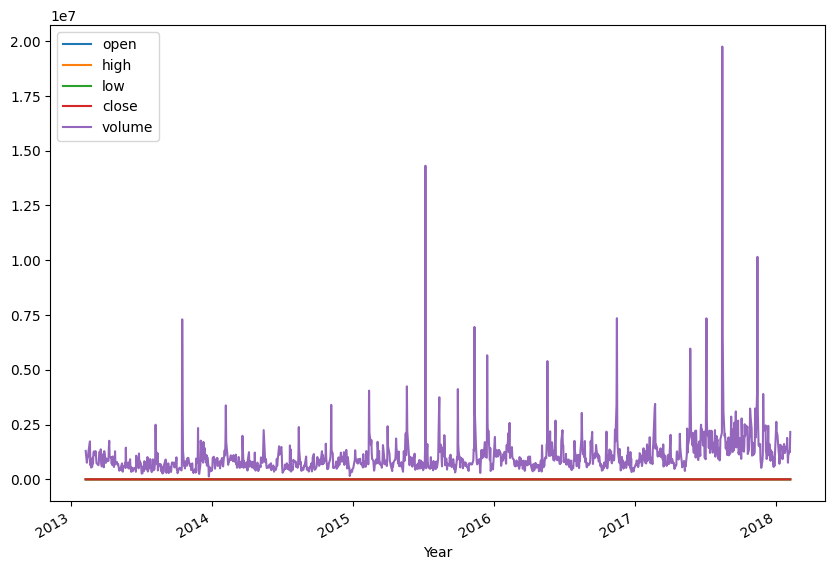

In [249]:
df.plot(figsize=(10,7))
plt.xlabel('Year')
plt.show()

In [250]:
df_v=df.volume
df_v.head()

date
2013-02-08    1298137
2013-02-11     758016
2013-02-12     876859
2013-02-13    1038574
2013-02-14    1005376
Name: volume, dtype: int64

In [251]:
test1 = sm.tsa.adfuller(df.open)
print('adf: ', test1[0])
print('p-value: ', test1[1])
print('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print('Pяд не стационарен')
else:
    print('Pяд стационарен')

test2 = sm.tsa.adfuller(df.high)
print('adf: ', test2[0])
print('p-value: ', test2[1])
print('Critical values: ', test2[4])
if test2[0]> test2[4]['5%']: 
    print('Pяд не стационарен')
else:
    print('Pяд стационарен')

test3 = sm.tsa.adfuller(df.low)
print('adf: ', test3[0])
print('p-value: ', test3[1])
print('Critical values: ', test3[4])
if test3[0]> test3[4]['5%']: 
    print('Pяд не стационарен')
else:
    print('Pяд стационарен')

test4 = sm.tsa.adfuller(df.close)
print('adf: ', test4[0])
print('p-value: ', test4[1])
print('Critical values: ', test4[4])
if test4[0]> test4[4]['5%']: 
    print('Pяд не стационарен')
else:
    print('Pяд стационарен')

test5 = sm.tsa.adfuller(df.volume)
print('adf: ', test5[0])
print('p-value: ', test5[1])
print('Critical values: ', test5[4])
if test5[0]> test5[4]['5%']: 
    print('Pяд не стационарен')
else:
    print('Pяд стационарен')



adf:  -1.85814495839199
p-value:  0.35199978922049246
Critical values:  {'1%': -3.4355588184378574, '5%': -2.8638402312881497, '10%': -2.5679946684494275}
Pяд не стационарен
adf:  -1.8177477608788513
p-value:  0.3716866995636672
Critical values:  {'1%': -3.4355588184378574, '5%': -2.8638402312881497, '10%': -2.5679946684494275}
Pяд не стационарен
adf:  -1.9146139633028787
p-value:  0.3252177796238077
Critical values:  {'1%': -3.4355588184378574, '5%': -2.8638402312881497, '10%': -2.5679946684494275}
Pяд не стационарен
adf:  -1.7863740362193679
p-value:  0.38724728162952976
Critical values:  {'1%': -3.4355796466416777, '5%': -2.863849421064024, '10%': -2.5679995625056926}
Pяд не стационарен
adf:  -14.320405601866899
p-value:  1.1438424578271111e-26
Critical values:  {'1%': -3.4355671297788666, '5%': -2.8638438984080117, '10%': -2.5679966213893057}
Pяд стационарен


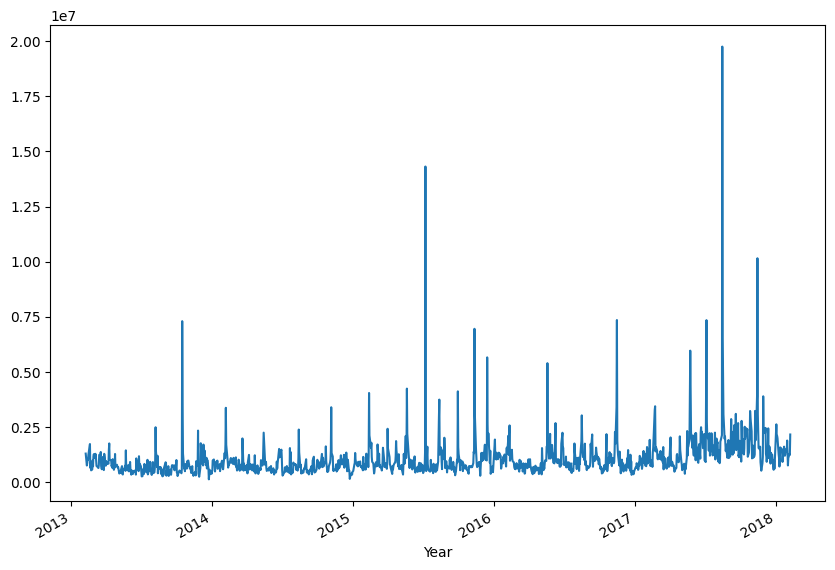

In [252]:
df_v.plot(figsize=(10,7))
plt.xlabel('Year')
plt.show()

count    1.259000e+03
mean     1.078043e+06
std      1.019365e+06
min      1.307120e+05
25%      6.182010e+05
50%      8.491350e+05
75%      1.219762e+06
max      1.974952e+07
Name: volume, dtype: float64

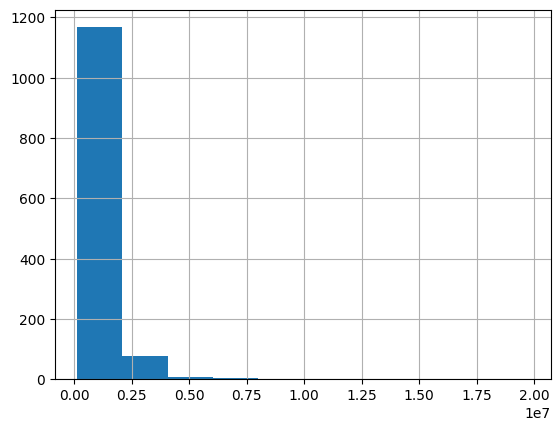

In [253]:
itog = df_v.describe()
df_v.hist()
itog

тест Харки — Бера для определения номарльности распределения

In [254]:
row =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(df_v)
a = np.vstack([jb_test])
itog = SimpleTable(a, row)
print (itog)

        JB        p-value        skew            kurtosis     
--------------------------------------------------------------
783887.7081473813     0.0 8.584839743122112 124.02998022768914
--------------------------------------------------------------


In [255]:
# m = df_v.index[len(df_v.index)/2+1]
# r1 = sm.stats.DescrStatsW(df_v[m:])
# r2 = sm.stats.DescrStatsW(df_v[:m])
# print ('p-value: ', sm.stats.CompareMeans(r1,r2).ttest_ind()[1])

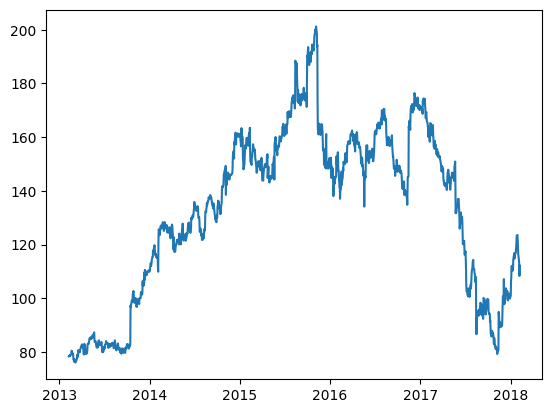

In [256]:
plt.figsize=(10,7)
plt.plot(df['open'])
plt.show()

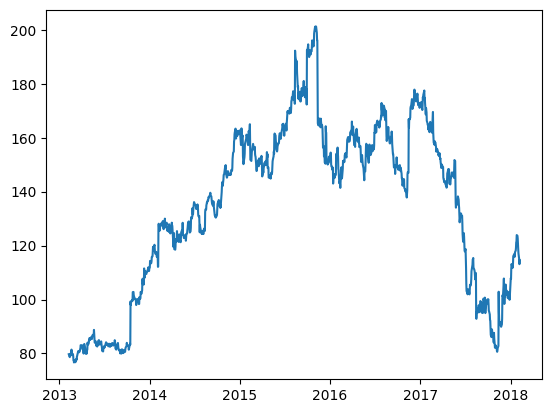

In [257]:
plt.figsize=(10,7)
plt.plot(df['high'])
plt.show()

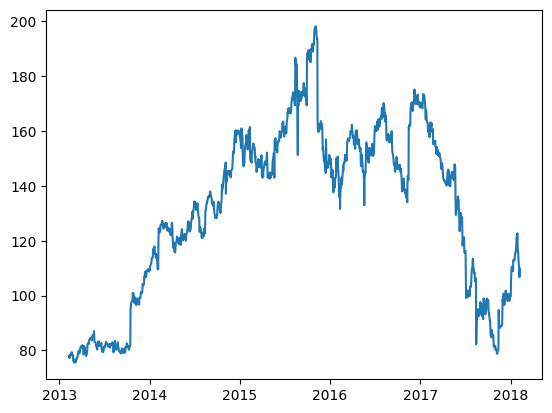

In [258]:
plt.figsize=(10,7)
plt.plot(df['low'])
plt.show()

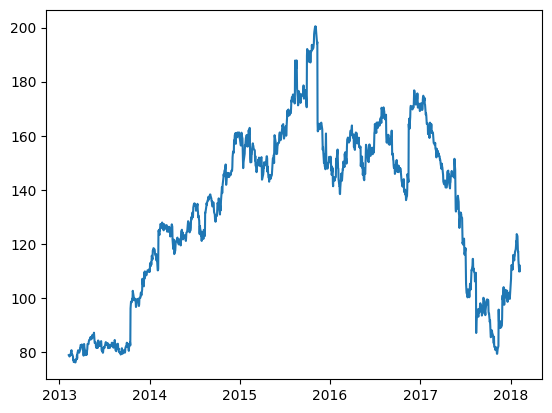

In [259]:
plt.figsize=(10,7)
plt.plot(df['close'])
plt.show()

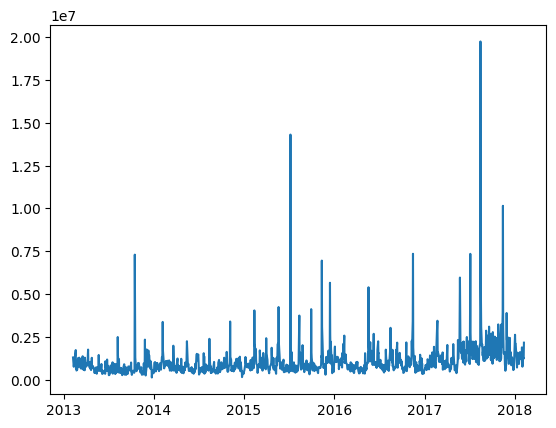

In [260]:
plt.figsize=(10,7)
plt.plot(df['volume'])
plt.show()

In [261]:
Q1,Q3 = np.percentile(df['volume'], [25,75])

 
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

down = Q1 - 1.5 * (Q3 - Q1)

outliers = [val for val in df['volume'] if int(val) < lower_bound  or val > upper_bound]

In [262]:
len(outliers)

82

In [263]:
df

,open,high,low,close,volume
date,,,,,
2013-02-08,78.34,79.7200,78.0100,78.90,1298137
2013-02-11,78.65,78.9100,77.2300,78.39,758016
2013-02-12,78.39,78.6300,77.5132,78.60,876859
2013-02-13,78.90,79.1300,77.8500,78.97,1038574
2013-02-14,78.66,79.7200,78.5850,78.84,1005376
...,...,...,...,...,...
2018-02-01,116.24,118.8300,115.8300,117.29,760629
2018-02-02,115.92,117.1800,113.1250,113.93,1092333
2018-02-05,113.05,114.9700,109.8100,109.86,1281592


In [264]:
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]

print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

Train Shape: (1007, 5)
Test Shape: (252, 5)


In [265]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [266]:
from pmdarima.arima import auto_arima

In [267]:
model = auto_arima(df['open'], seasonal=True, m=12, trace=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5846.805, Time=6.41 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5840.909, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5844.720, Time=0.67 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5844.728, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5839.059, Time=0.05 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=5842.722, Time=0.49 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=5842.729, Time=0.89 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=5844.510, Time=2.68 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=5842.907, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=5842.907, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5844.907, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 12.744 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1259
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2918.529
Date:                Tue, 25 Apr 2023   AIC                           5839.059
Time:                        10:48:20   BIC                           5844.196
Sample:                             0   HQIC                          5840.989
                               - 1259                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         6.0622      0.088     68.675      0.000       5.889       6.235
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8854.19
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.59   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [277]:
model = ARIMA(train['open'], order=(0, 1, 0)).fit()
predictions = model.predict(start='2016-02-01',end='2017-02-07',steps=252)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: xlabel='date'>

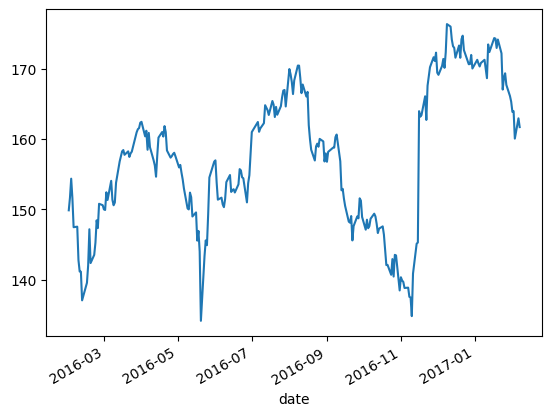

In [278]:
predictions.plot()

In [279]:
from sklearn.metrics import mean_squared_error

In [280]:
from sklearn.metrics import mean_absolute_error

In [281]:
# mae = mean_absolute_error(test['open'], predictions) 
# print("Mean Absolute Error (MAE):", mae)

In [282]:
model = auto_arima(df['high'], seasonal=True, m=12, trace=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5754.967, Time=11.02 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5750.290, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5753.382, Time=0.50 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5753.346, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5748.462, Time=0.05 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=5751.760, Time=0.50 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=5751.751, Time=0.49 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=5753.742, Time=1.27 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=5751.930, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=5751.904, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5752.724, Time=0.55 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 15.664 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1259
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2873.231
Date:                Tue, 25 Apr 2023   AIC                           5748.462
Time:                        10:52:12   BIC                           5753.599
Sample:                             0   HQIC                          5750.392
                               - 1259                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         5.6410      0.062     91.304      0.000       5.520       5.762
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):             31807.16
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               2.39   Skew:                             1.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [290]:
model = ARIMA(train['high'], order=(0, 1, 0)).fit()
predictions = model.predict(start='2016-02-01',end='2017-02-07',steps=252)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: xlabel='date'>

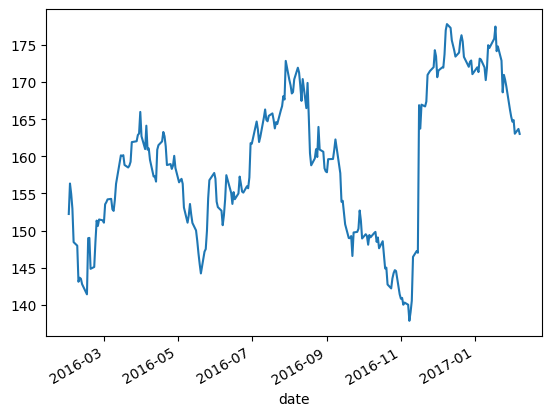

In [291]:
predictions.plot()

In [286]:
model = auto_arima(df['low'], seasonal=True, m=12, trace=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=6007.733, Time=6.19 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6000.642, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6003.353, Time=0.66 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6003.242, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5998.759, Time=0.07 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=6002.533, Time=0.32 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=6002.538, Time=0.47 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=6004.393, Time=3.42 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=6001.477, Time=0.24 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=6001.361, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=6000.995, Time=1.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 14.031 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1259
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2998.380
Date:                Tue, 25 Apr 2023   AIC                           5998.759
Time:                        10:53:51   BIC                           6003.897
Sample:                             0   HQIC                          6000.690
                               - 1259                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         6.8828      0.065    106.633      0.000       6.756       7.009
===================================================================================
Ljung-Box (L1) (Q):                   1.17   Jarque-Bera (JB):             61916.51
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               3.79   Skew:                            -1.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [293]:
model = ARIMA(train['low'], order=(0, 1, 0)).fit()
predictions = model.predict(start='2016-02-01',end='2017-02-07',steps=252)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: xlabel='date'>

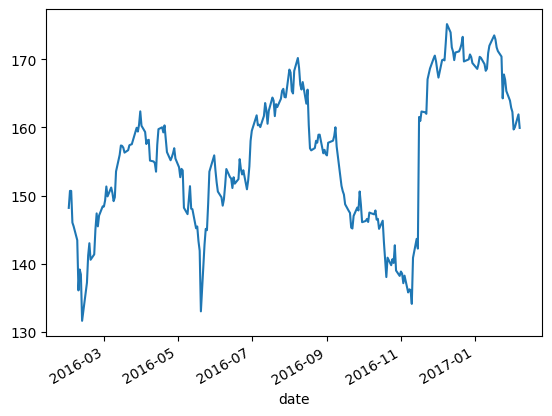

In [294]:
predictions.plot()

In [295]:
model = auto_arima(df['close'], seasonal=True, m=12, trace=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5861.586, Time=8.08 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5865.334, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5869.053, Time=0.54 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5869.067, Time=1.16 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5863.457, Time=0.08 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=5860.035, Time=12.65 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=5858.344, Time=5.15 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=5860.013, Time=10.05 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=5866.595, Time=0.73 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=5866.128, Time=0.60 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=5860.025, Time=5.64 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=5860.007, Time=5.50 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5868.577, Time=1.27 sec
 ARIMA(1,1,3)(0,0,0)[12] intercept   : AIC=5866.399, Time=2.24 sec
 ARIMA(3,1,1)(0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1259
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2923.234
Date:                Tue, 25 Apr 2023   AIC                           5856.467
Time:                        10:59:33   BIC                           5882.154
Sample:                             0   HQIC                          5866.121
                               - 1259                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6664      0.035    -19.022      0.000      -0.735      -0.598
ar.L2         -0.9421      0.037    -25.666      0.000      -1.014      -0.870
ma.L1          0.6878      0.041     16.915      0.000       0.608       0.767
ma.L2          0.9213      0.043     21.189      0.000       0.836       1.006
sigma2         6.1071      0.072     84.992      0.000       5.966       6.248
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):             54973.81
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               2.63   Skew:                            -0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [298]:
model = ARIMA(train['close'], order=(0, 1, 0)).fit()
predictions = model.predict(start='2016-02-01',end='2017-02-07',steps=252)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: xlabel='date'>

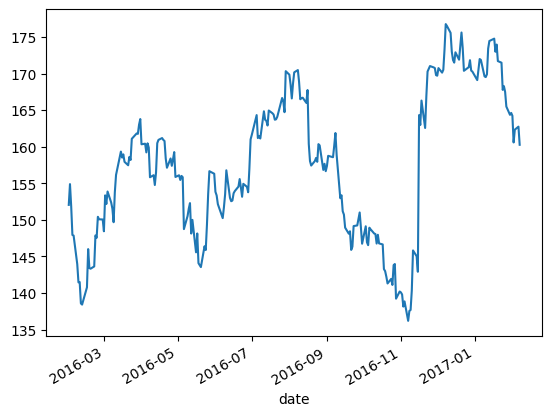

In [299]:
predictions.plot()